# AdaBoost step by step

Reference: https://www.kdnuggets.com/2020/12/implementing-adaboost-algorithm-from-scratch.html

Code: https://github.com/jamesajeeth/Data-Science/blob/master/Adaboost%20from%20scratch/Boosting%20Algorithm%20from%20scratch%20updated.ipynb

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)

In [3]:
#importing file
iris = pd.read_csv("iris.csv")

In [4]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [5]:
#considering only two classes
example = iris[(iris['species'] == 'versicolor') | (iris['species'] == 'virginica')]

In [6]:
example.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [7]:
#replacing the two classes with +1 and -1
example['Label'] = example['species'].replace(to_replace = ['versicolor','virginica'], value=[1,-1])

C:\Users\PPj\AppData\Local\Temp\ipykernel_22176\3450875841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['Label'] = example['species'].replace(to_replace = ['versicolor','virginica'], value=[1,-1])


In [8]:
example = example.drop('species', axis = 1)

In [9]:
#Initially assign same weights to each records in the dataset
example['probR1'] = 1/(example.shape[0])

In [10]:
example.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1
50,7.0,3.2,4.7,1.4,1,0.01
51,6.4,3.2,4.5,1.5,1,0.01
52,6.9,3.1,4.9,1.5,1,0.01
53,5.5,2.3,4.0,1.3,1,0.01
54,6.5,2.8,4.6,1.5,1,0.01


In [12]:
import random

#simple random sample with replacement
random.seed(10)
example1 = example.sample(len(example), replace = True, weights = example['probR1'])

In [13]:
example1

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1
98,5.1,2.5,3.0,1.1,1,0.01
68,6.2,2.2,4.5,1.5,1,0.01
56,6.3,3.3,4.7,1.6,1,0.01
57,4.9,2.4,3.3,1.0,1,0.01
132,6.4,2.8,5.6,2.2,-1,0.01
63,6.1,2.9,4.7,1.4,1,0.01
128,6.4,2.8,5.6,2.1,-1,0.01
64,5.6,2.9,3.6,1.3,1,0.01
129,7.2,3.0,5.8,1.6,-1,0.01
139,6.9,3.1,5.4,2.1,-1,0.01


In [14]:
#X_train and Y_train split
X_train = example1.iloc[0:len(iris),0:4]
y_train = example1.iloc[0:len(iris),4]

In [16]:
from sklearn.tree import DecisionTreeClassifier

#fitting the DT model with depth one
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

[Text(0.5, 0.75, 'x[3] <= 1.7\ngini = 0.476\nsamples = 100\nvalue = [39, 61]'),
 Text(0.25, 0.25, 'gini = 0.116\nsamples = 65\nvalue = [4, 61]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]')]

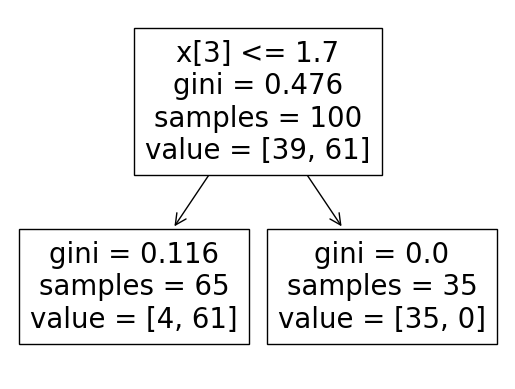

In [18]:
from sklearn import tree

#plotting tree for round 1 boosting
tree.plot_tree(clf)

In [19]:
#prediction
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [20]:
#adding a column pred1 after the first round of boosting
example['pred1'] = y_pred

In [21]:
example

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1
50,7.0,3.2,4.7,1.4,1,0.01,1
51,6.4,3.2,4.5,1.5,1,0.01,1
52,6.9,3.1,4.9,1.5,1,0.01,1
53,5.5,2.3,4.0,1.3,1,0.01,1
54,6.5,2.8,4.6,1.5,1,0.01,1
55,5.7,2.8,4.5,1.3,1,0.01,1
56,6.3,3.3,4.7,1.6,1,0.01,1
57,4.9,2.4,3.3,1.0,1,0.01,1
58,6.6,2.9,4.6,1.3,1,0.01,1
59,5.2,2.7,3.9,1.4,1,0.01,1


In [22]:
#misclassified = 0 if the label and prediction are same
example.loc[example.Label != example.pred1, 'misclassified'] = 1
example.loc[example.Label == example.pred1, 'misclassified'] = 0

In [23]:
#error calculation
e1 = sum(example['misclassified'] * example['probR1'])

In [24]:
e1

0.060000000000000005

In [26]:
from math import log

#calculation of alpha (performance)
alpha1 = 0.5*log((1-e1)/e1)

In [28]:
import numpy as np

#update weight
new_weight = example['probR1']*np.exp(-1*alpha1*example['Label']*example['pred1'])

In [29]:
#normalized weight
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [30]:
example['prob2'] = round(normalized_weight,4)

In [31]:
example

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0053
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0053
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0053
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0053
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0053


In [32]:
#round 2
random.seed(20)
example2 = example.sample(len(example), replace = True, weights = example['prob2'])
example2 = example2.iloc[:,0:5]
X_train = example2.iloc[0:len(iris),0:4]
y_train = example2.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
#adding a column pred2 after the second round of boosting
example['pred2'] = y_pred

[Text(0.5, 0.75, 'x[2] <= 4.95\ngini = 0.487\nsamples = 100\nvalue = [58, 42]'),
 Text(0.25, 0.25, 'gini = 0.188\nsamples = 38\nvalue = [4, 34]'),
 Text(0.75, 0.25, 'gini = 0.225\nsamples = 62\nvalue = [54, 8]')]

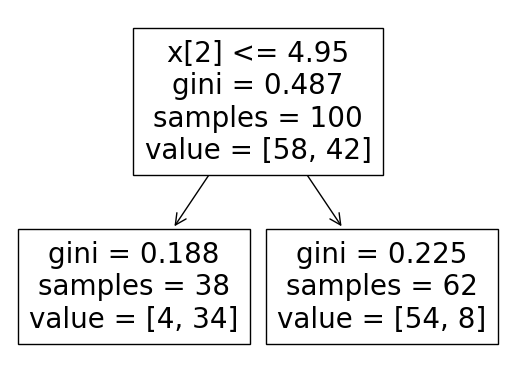

In [33]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [34]:
example

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053,1
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053,1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053,1
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0053,1
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0053,1
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0053,1
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0053,1
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0053,1


In [35]:
#adding a field misclassified2
example.loc[example.Label != example.pred2, 'misclassified2'] = 1
example.loc[example.Label == example.pred2, 'misclassified2'] = 0

In [36]:
# calculation of error
e2 = sum(example['misclassified2'] * example['prob2'])
e2

0.1204

In [37]:
#calculation of alpha
alpha2 = 0.5*log((1-e2)/e2)
alpha2

0.9943238629029427

In [38]:
#update weight
new_weight = example['prob2']*np.exp(-1*alpha2*example['Label']*example['pred2'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [39]:
example['prob3'] = round(normalized_weight,4)

In [40]:
example

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.0030
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0030
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0030
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.0030
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0030
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.0030
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0053,1,0.0,0.0030
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0053,1,0.0,0.0030
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.0030
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.0030


In [41]:
#round 3
random.seed(30)
example3 = example.sample(len(example), replace = True, weights = example['prob3'])
example3 = example3.iloc[:,0:5]
X_train = example3.iloc[0:len(iris),0:4]
y_train = example3.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred3 after the third round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred3'] = y_pred

[Text(0.5, 0.75, 'x[2] <= 5.05\ngini = 0.499\nsamples = 100\nvalue = [48, 52]'),
 Text(0.25, 0.25, 'gini = 0.432\nsamples = 73\nvalue = [23, 50]'),
 Text(0.75, 0.25, 'gini = 0.137\nsamples = 27\nvalue = [25, 2]')]

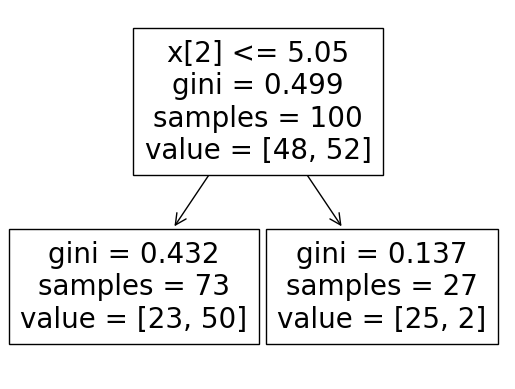

In [42]:
#plotting tree for round 3 boosting
tree.plot_tree(clf)

In [43]:
#adding a field misclassified3
example.loc[example.Label != example.pred3, 'misclassified3'] = 1
example.loc[example.Label == example.pred3, 'misclassified3'] = 0

In [44]:
#weighted error calculation
e3 = sum(example['misclassified3'] * example['prob3']) #/len(example)
e3

0.20739999999999997

In [45]:
#calculation of performance(alpha)
alpha3 = 0.5*log((1-e3)/e3)

In [46]:
#update weight
new_weight = example['prob3']*np.exp(-1*alpha3*example['Label']*example['pred3'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [47]:
example['prob4'] = round(normalized_weight,4)

In [48]:
example

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019


In [49]:
#Round 4
random.seed(40)
example4 = example.sample(len(example), replace = True, weights = example['prob4'])
example4 = example4.iloc[:,0:5]
X_train = example4.iloc[0:len(iris),0:4]
y_train = example4.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred4 after the fourth round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred4'] = y_pred

[Text(0.5, 0.75, 'x[0] <= 6.55\ngini = 0.449\nsamples = 100\nvalue = [66, 34]'),
 Text(0.25, 0.25, 'gini = 0.326\nsamples = 78\nvalue = [62, 16]'),
 Text(0.75, 0.25, 'gini = 0.298\nsamples = 22\nvalue = [4, 18]')]

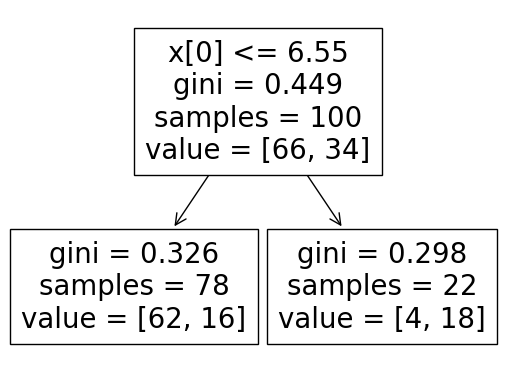

In [50]:
#plotting tree for round 4 boosting
tree.plot_tree(clf)

In [51]:
#adding a field misclassified4
example.loc[example.Label != example.pred4, 'misclassified4'] = 1
example.loc[example.Label == example.pred4, 'misclassified4'] = 0

In [52]:
#error calculation
e4 = sum(example['misclassified4'] * example['prob4']) 
e4

0.22880000000000045

In [53]:
# calculation of performance (alpha)
alpha4 = 0.5*log((1-e4)/e4)

In [54]:
#printing the alpha value which is used in each round of boosting
print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)

1.3757676565209744
0.9943238629029427
0.670334692480454
0.6075497418953453


In [55]:
#final prediction
t = alpha1 * example['pred1'] + alpha2 * example['pred2'] + alpha3 * example['pred3'] + alpha4 * example['pred4']

In [56]:
#sign of the final prediction
np.sign(list(t))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [57]:
example['final_pred'] = np.sign(list(t))

In [58]:
example

,sepal_length,sepal_width,petal_length,petal_width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4,pred4,misclassified4,final_pred
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
52,6.9,3.1,4.9,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0053,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0


In [60]:
from sklearn.metrics import confusion_matrix

#Confusion matrix
c=confusion_matrix(example['Label'], example['final_pred'])
c

array([[48,  2],
       [ 3, 47]], dtype=int64)

In [61]:
#Overall Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100

95.0

## Using scikit-learn

In [62]:
from sklearn.ensemble import AdaBoostClassifier

iris = pd.read_csv("iris.csv")  
iris = iris[(iris['species'] == 'versicolor') | (iris['species'] == 'virginica')]

#X_train and Y_train split
X_train = iris.iloc[0:len(iris),0:4]
y_train = iris.iloc[0:len(iris),4]

clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X_train, y_train)

clf.predict([[5.5, 2.5, 4.0, 1.3]])

clf.score(X_train, y_train)

C:\Users\PPj\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


0.96